# EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.

# Import Data

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Data Bootcamp/EDA Case Study'

In [50]:
try:
    print("Loading application_data.csv...")
    app_data = pd.read_csv(os.path.join(folder_path, 'application_data.csv'))
    print("Loading previous_application.csv...")
    prev_app = pd.read_csv(os.path.join(folder_path, 'previous_application.csv'))
    # print("Loading columns_description.xlsx...")
    # col_desc = pd.read_excel(os.path.join(folder_path, 'columns_description.xlsx'))

    print("\nSUCCESS: All files loaded.")

except FileNotFoundError as e:
    print(f"\nERROR: Could not find a file. {e}")
    print("Please check that 'folder_path' is correct and files are uploaded.")

Loading application_data.csv...
Loading previous_application.csv...

SUCCESS: All files loaded.


# Checking Duplicates / Missing Data

In [51]:
# 1. Check for Duplicate Loan IDs
if app_data['SK_ID_CURR'].duplicated().sum() > 0:
    print(f"WARNING: Found {app_data['SK_ID_CURR'].duplicated().sum()} duplicate loan IDs!")
else:
    print("PASSED: No duplicate loan IDs found.")

# 2. Check Class Balance (The Target)
target_counts = app_data['TARGET'].value_counts(normalize=True) * 100
print("\nTarget Class Distribution (%):")
print(target_counts)

# 3. Check Critical Missing Values
missing_annuity = app_data['AMT_ANNUITY'].isnull().sum()
missing_goods = app_data['AMT_GOODS_PRICE'].isnull().sum()
print(f"\nMissing AMT_ANNUITY: {missing_annuity}")
print(f"Missing AMT_GOODS_PRICE: {missing_goods}")

PASSED: No duplicate loan IDs found.

Target Class Distribution (%):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Missing AMT_ANNUITY: 12
Missing AMT_GOODS_PRICE: 278


# Distributions (Focus: Income, Credit Amount, Annuity(Loan Payment))

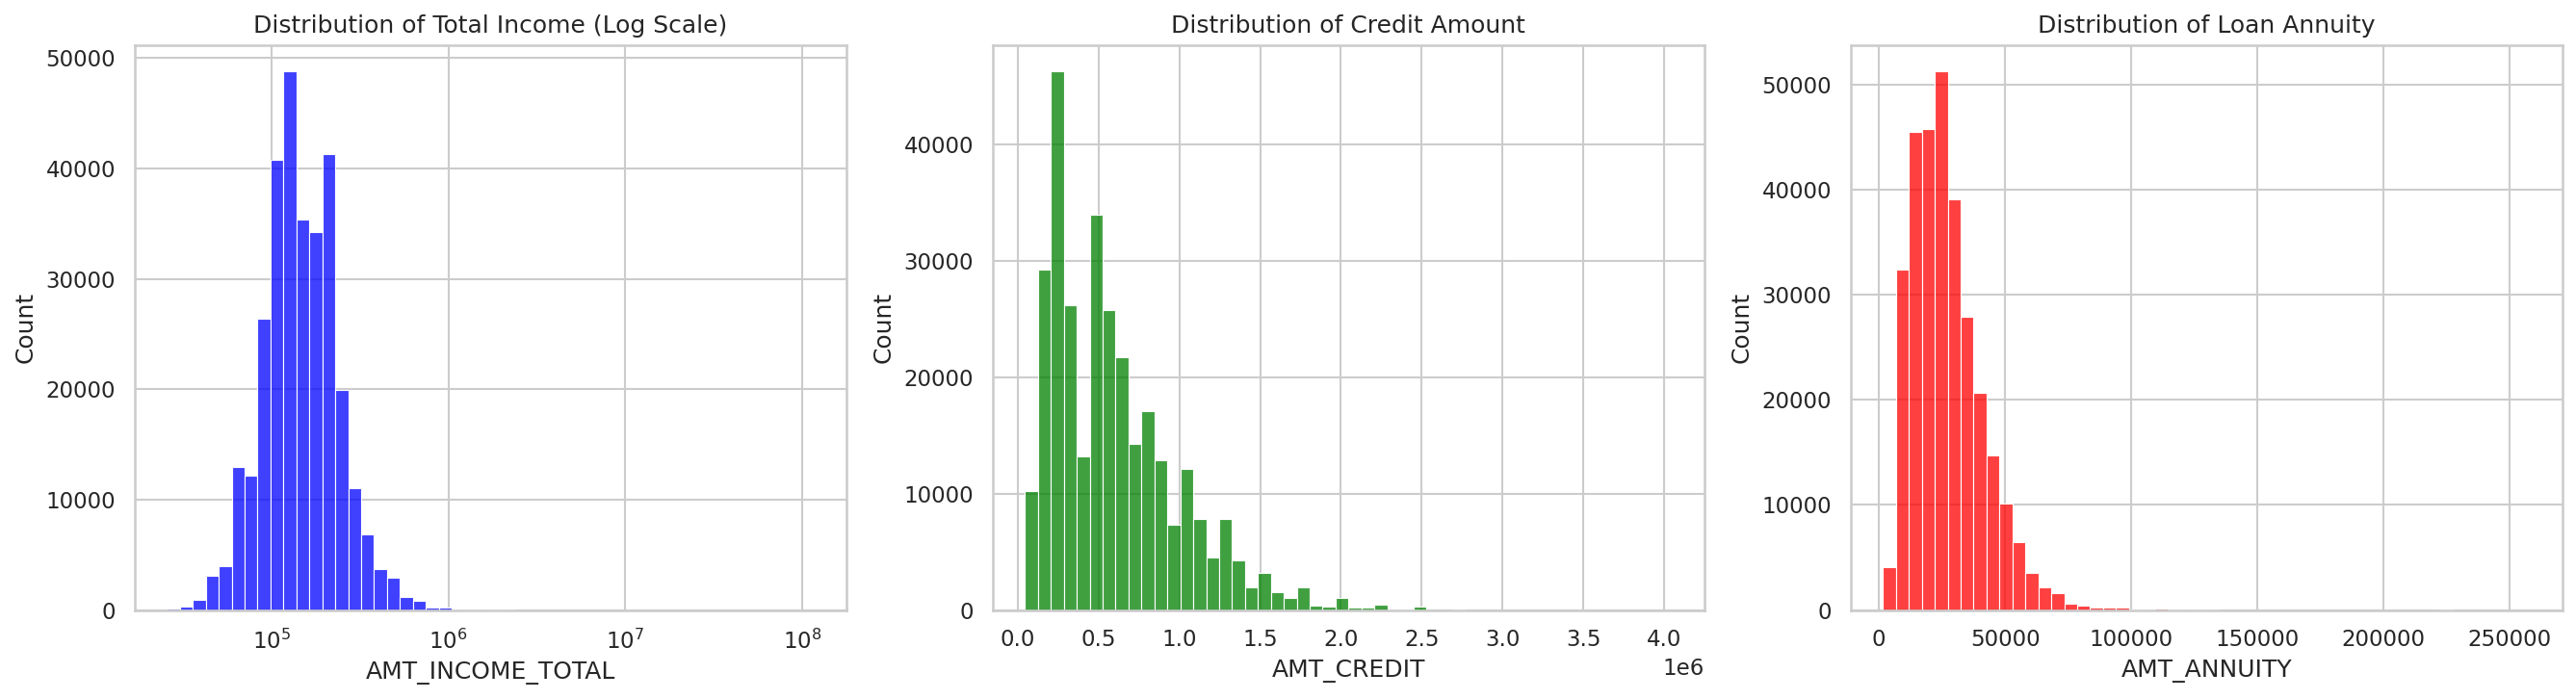

In [52]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure for the "Amount" distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Income Distribution (Log Scale is usually needed)
sns.histplot(app_data['AMT_INCOME_TOTAL'], bins=50, ax=axes[0], log_scale=True, color='blue')
axes[0].set_title('Distribution of Total Income (Log Scale)')

# 2. Credit Amount Distribution
sns.histplot(app_data['AMT_CREDIT'], bins=50, ax=axes[1], color='green')
axes[1].set_title('Distribution of Credit Amount')

# 3. Annuity (Loan Payment) Distribution
sns.histplot(app_data['AMT_ANNUITY'].dropna(), bins=50, ax=axes[2], color='red')
axes[2].set_title('Distribution of Loan Annuity')

plt.tight_layout()
plt.show()

# Data Cleaning & Outlier Treatment (Focus: Children & Income)

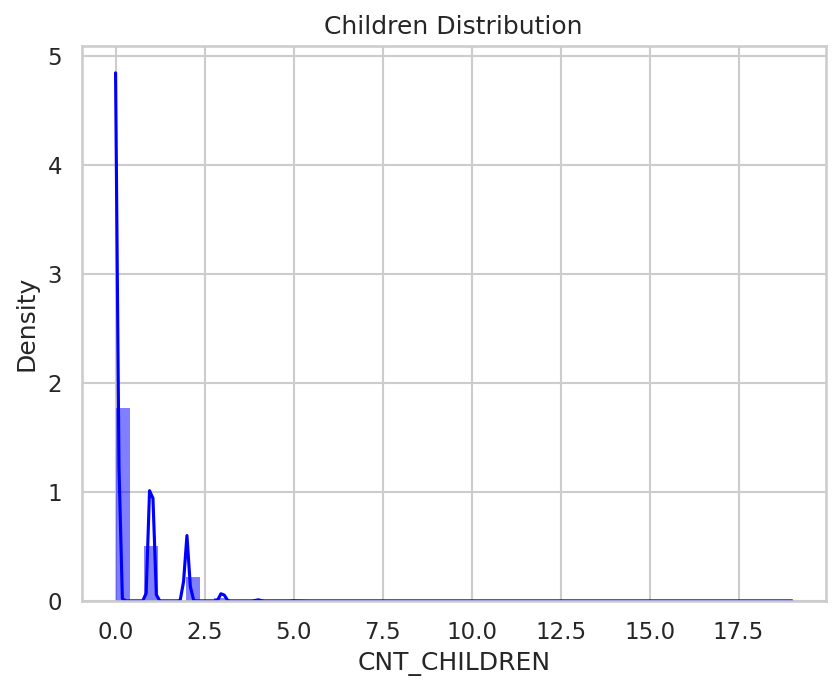

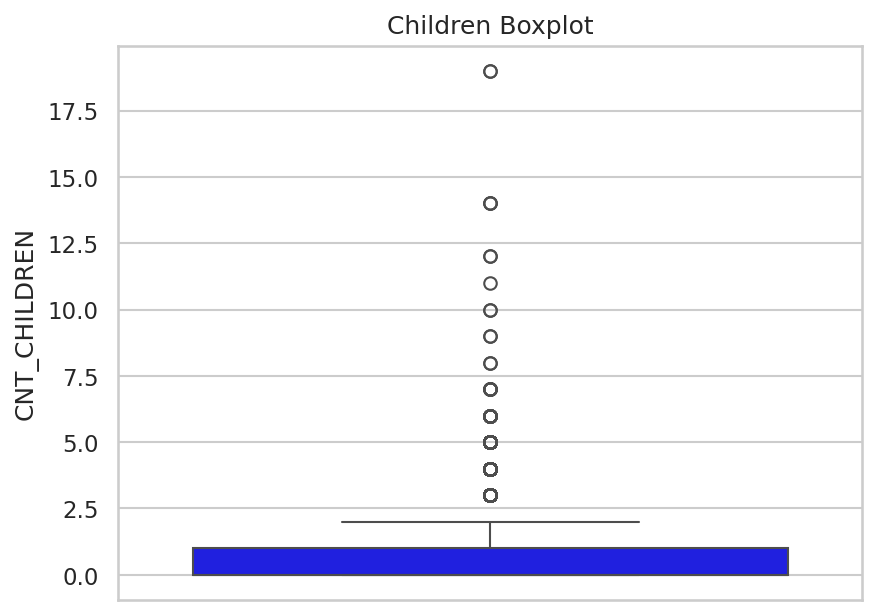

In [53]:
# Analysis of `CNT_CHILDREN`
# kde displot
sns.histplot(app_data['CNT_CHILDREN'], kde=True, stat='density', color='blue', binwidth=0.4, edgecolor='none')
plt.title('Children Distribution')
plt.show()

# boxplot
sns.boxplot(app_data['CNT_CHILDREN'], color = 'blue')
plt.title('Children Boxplot')
plt.show()

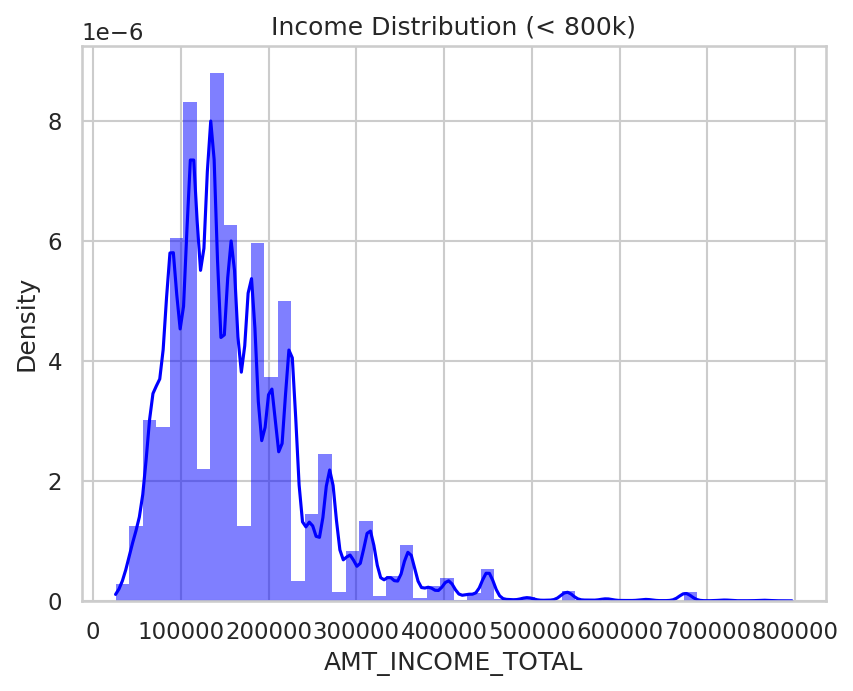

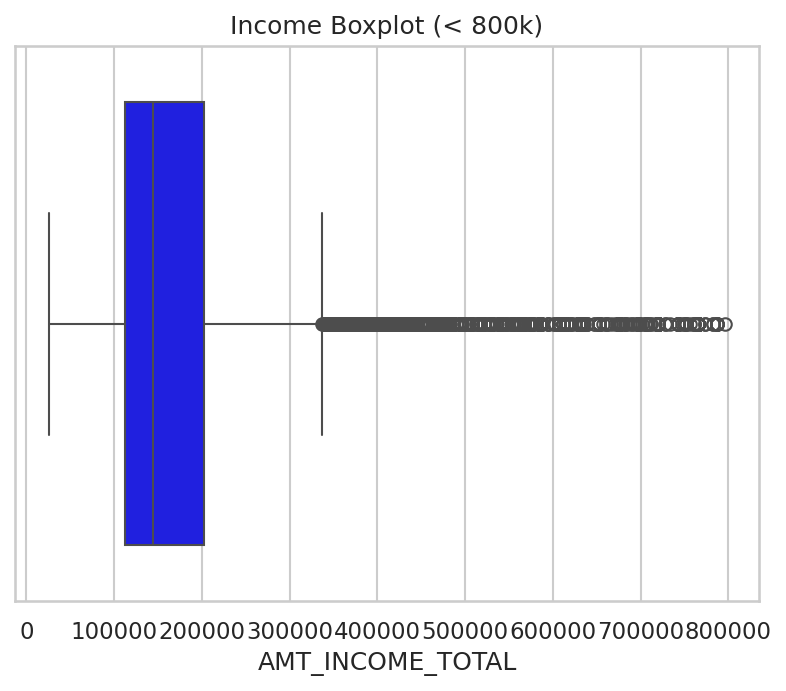

In [54]:
# Analysis of `AMT_INCOME_TOTAL`
# kde displot
subset = app_data[app_data['AMT_INCOME_TOTAL'] < 800000]
sns.histplot(subset['AMT_INCOME_TOTAL'], kde=True, stat='density', color='blue', bins = 50, edgecolor='none')
plt.title('Income Distribution (< 800k)')
plt.show()

# boxplot
sns.boxplot(x = subset['AMT_INCOME_TOTAL'], color = 'blue')
plt.title('Income Boxplot (< 800k)')
plt.show()

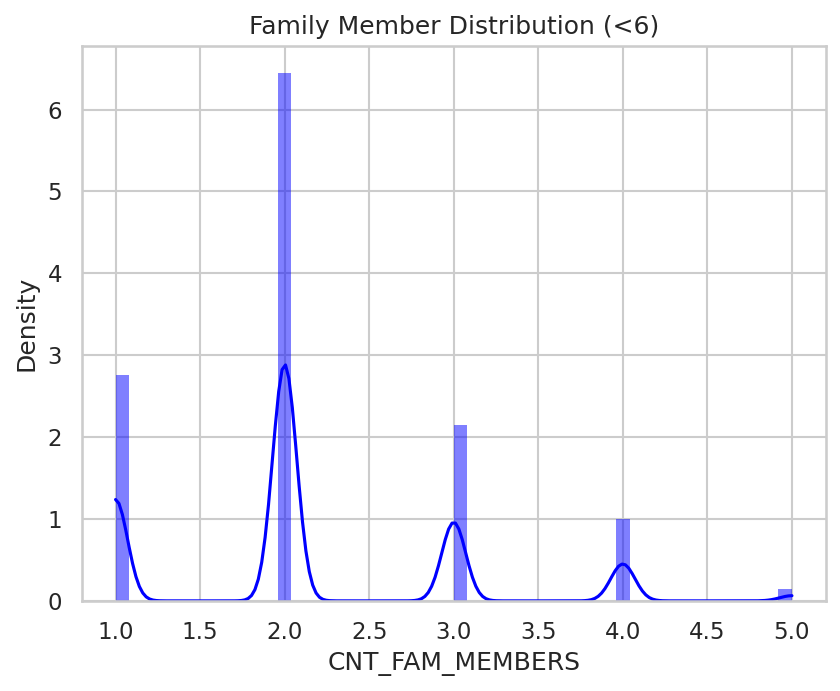

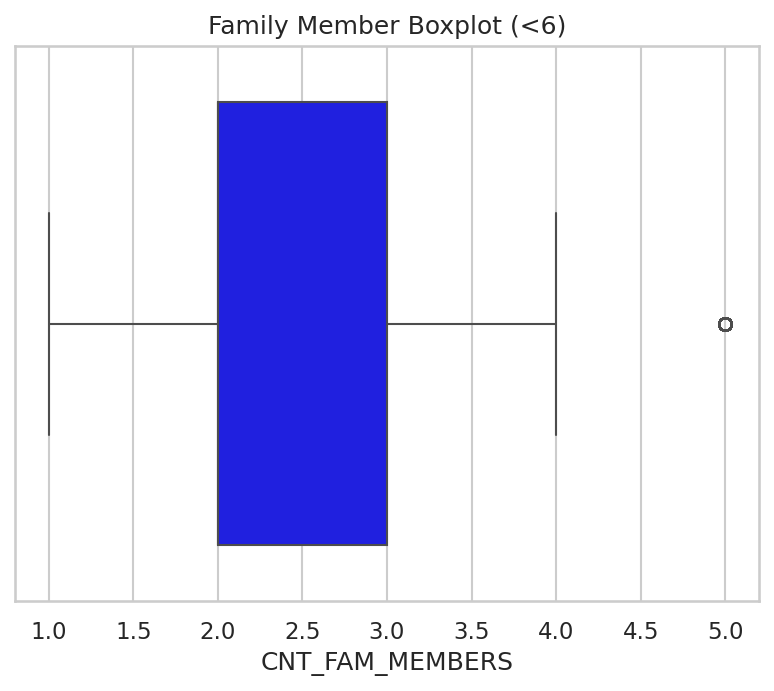

In [55]:
# Analysis of `CNT_FAM_MEMBERS`
# kde displot
subset = app_data[app_data['CNT_FAM_MEMBERS'] < 6]
sns.histplot(subset['CNT_FAM_MEMBERS'], kde=True, stat='density', color='blue', bins = 50, edgecolor='none')
plt.title('Family Member Distribution (<6)')
plt.show()

# boxplot
sns.boxplot(x = subset['CNT_FAM_MEMBERS'], color = 'blue')
plt.title('Family Member Boxplot (<6)')
plt.show()

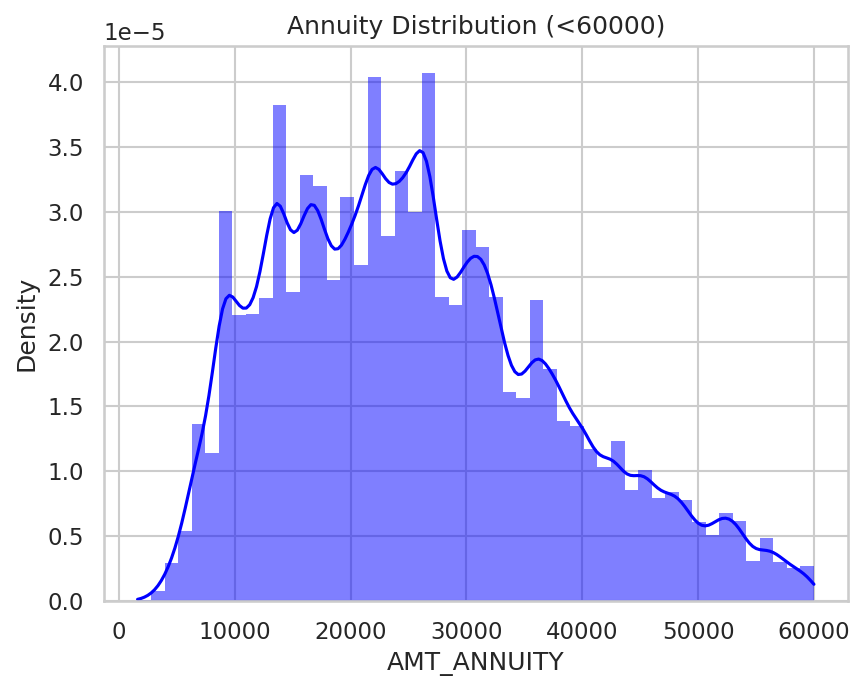

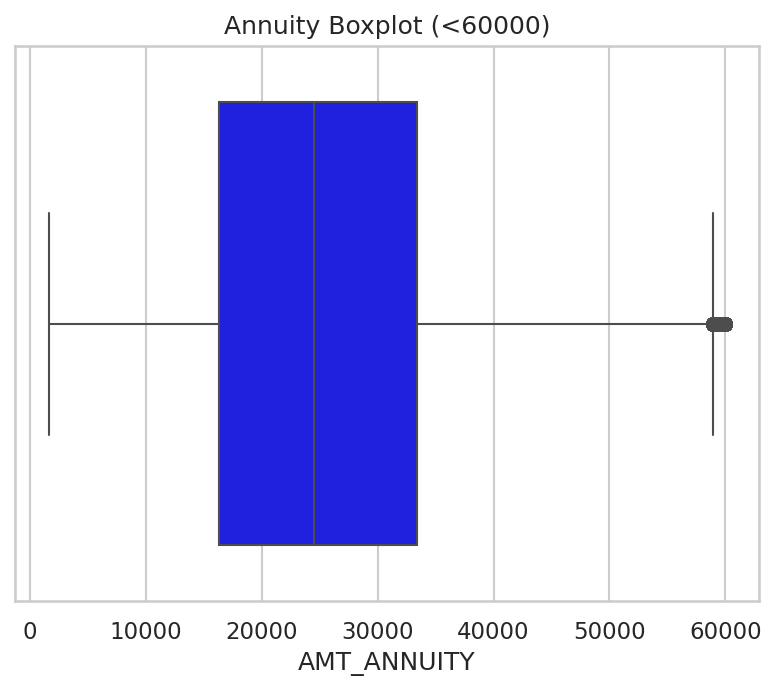

In [56]:
# Analysis of `AMT_ANNUITY`
# kde displot
subset = app_data[app_data['AMT_ANNUITY'] < 60000]
sns.histplot(subset['AMT_ANNUITY'], kde=True, stat='density', color='blue', bins = 50, edgecolor='none')
plt.title('Annuity Distribution (<60000)')
plt.show()

# boxplot
sns.boxplot(x = subset['AMT_ANNUITY'], color = 'blue')
plt.title('Annuity Boxplot (<60000)')
plt.show()

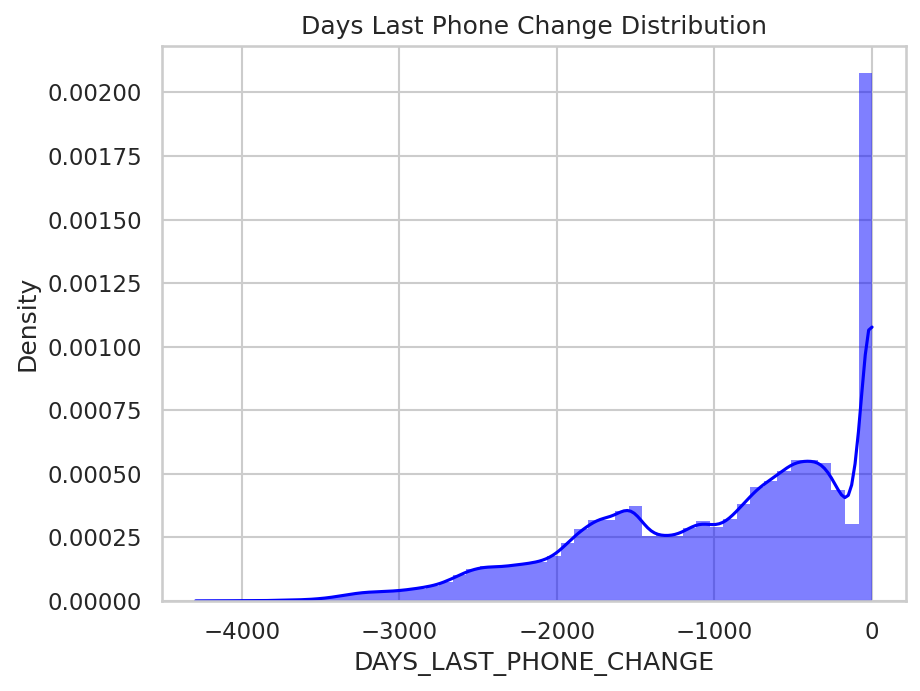

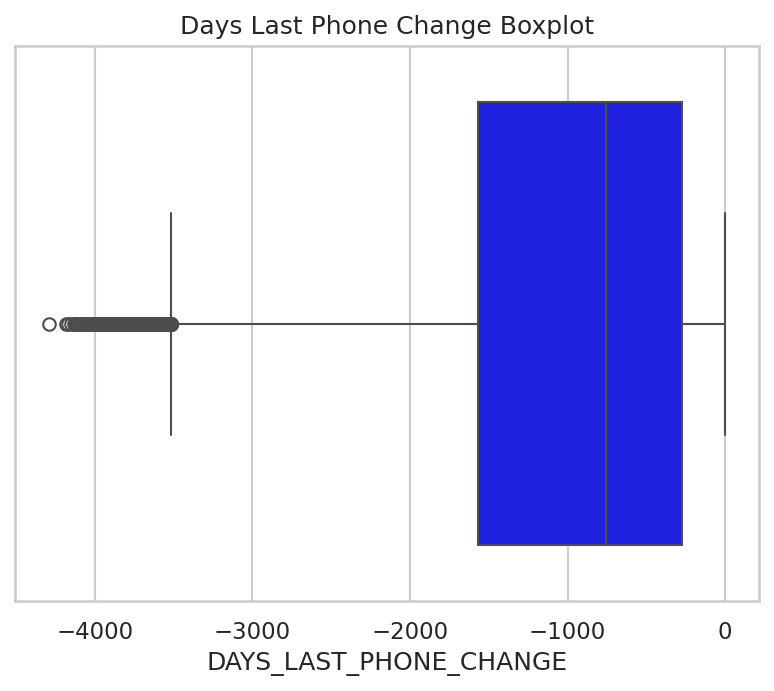

In [57]:
# Analysis of `DAYS_LAST_PHONE_CHANGE`
# kde displot
sns.histplot(app_data['DAYS_LAST_PHONE_CHANGE'], kde=True, stat='density', color='blue', bins = 50, edgecolor='none')
plt.title('Days Last Phone Change Distribution')
plt.show()

# boxplot
sns.boxplot(x = app_data['DAYS_LAST_PHONE_CHANGE'], color = 'blue')
plt.title('Days Last Phone Change Boxplot')
plt.show()

# Univariate Analysis - Categorical (Focus: Income Type, Education, Family Status)

The bar chart distributions for Income Type, Education Level, and Family Status collectively indicate that financial and structural stability are the strongest predictors of loan repayment.

### Income Source:
Vulnerable employment statuses, specifically "Maternity leave" (approx. 40%) and "Unemployed" (approx. 36%), exhibit exceptionally high default rates. Conversely, individuals with highly secure, fixed incomes such as "Pensioners" and "State servants" represent the lowest risk (approx. 5%).

### Education Level:
There is a strict inverse relationship between formal education and default risk. Applicants with an "Academic degree" are the safest cohort (<2% default rate), while risk steadily increases as education decreases, peaking with the "Lower secondary" cohort (>10%).

### Family Structure:
Cohorts traditionally associated with established household stability ("Married" and "Widow") demonstrate lower default rates (6% - 7.5%). In contrast, "Single / not married" and "Civil marriage" applicants carry higher baseline risks (9.5% - 10%).

## Check Sample Size for

In [77]:
def rate_and_n(col):
    out = (app_data.groupby(col)["TARGET"]
           .agg(n="size", default_rate="mean")
           .assign(default_pct=lambda d: d["default_rate"]*100)
           .sort_values("n"))
    return out

,n,default_rate,default_pct
NAME_INCOME_TYPE,,,
Maternity leave,5,0.400000,40.000000
Businessman,10,0.000000,0.000000
Student,18,0.000000,0.000000
Unemployed,22,0.363636,36.363636
State servant,21703,0.057550,5.754965
Pensioner,55362,0.053864,5.386366
Commercial associate,71617,0.074843,7.484257
Working,158774,0.095885,9.588472


In [81]:
rate_and_n("NAME_EDUCATION_TYPE")

,n,default_rate,default_pct
NAME_EDUCATION_TYPE,,,
Academic degree,164,0.018293,1.829268
Lower secondary,3816,0.109277,10.927673
Incomplete higher,10277,0.084850,8.484966
Higher education,74863,0.053551,5.355115
Secondary / secondary special,218391,0.089399,8.939929


In [80]:
rate_and_n("NAME_FAMILY_STATUS")

,n,default_rate,default_pct
NAME_FAMILY_STATUS,,,
Unknown,2,0.000000,0.000000
Widow,16088,0.058242,5.824217
Separated,19770,0.081942,8.194234
Civil marriage,29775,0.099446,9.944584
Single / not married,45444,0.098077,9.807675
Married,196432,0.075599,7.559868


In [79]:
rate_and_n("NAME_INCOME_TYPE")

,n,default_rate,default_pct
NAME_INCOME_TYPE,,,
Maternity leave,5,0.400000,40.000000
Businessman,10,0.000000,0.000000
Student,18,0.000000,0.000000
Unemployed,22,0.363636,36.363636
State servant,21703,0.057550,5.754965
Pensioner,55362,0.053864,5.386366
Commercial associate,71617,0.074843,7.484257
Working,158774,0.095885,9.588472


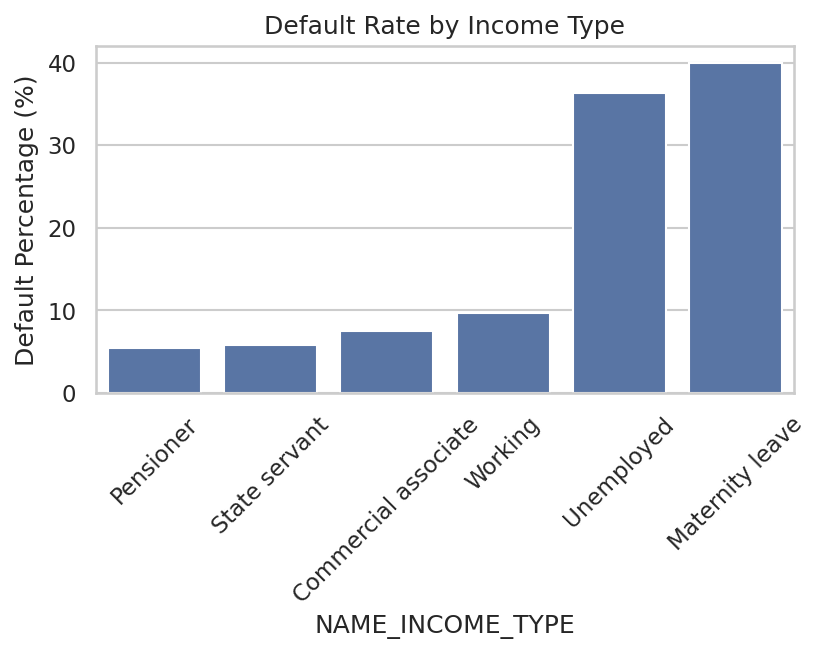

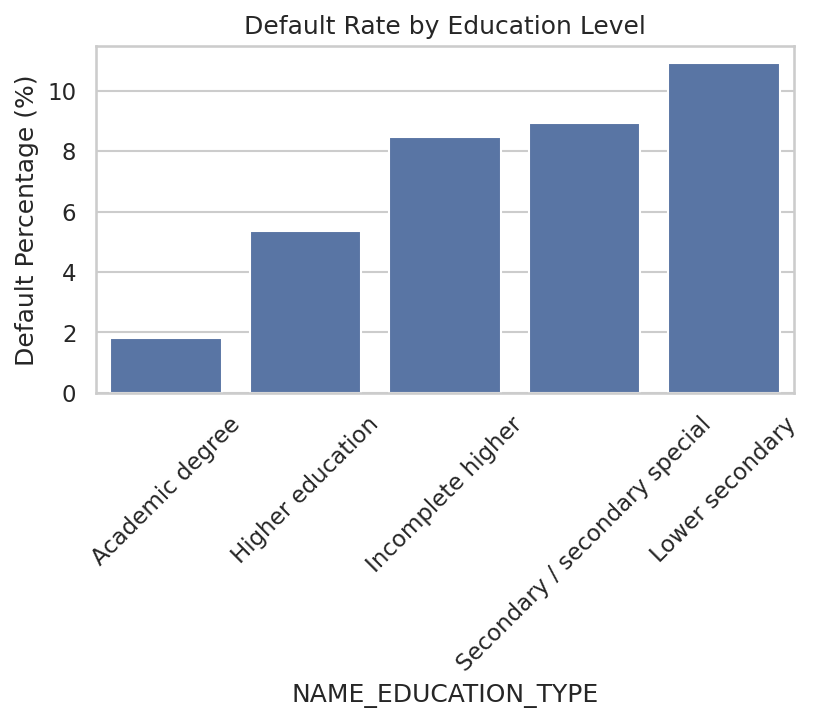

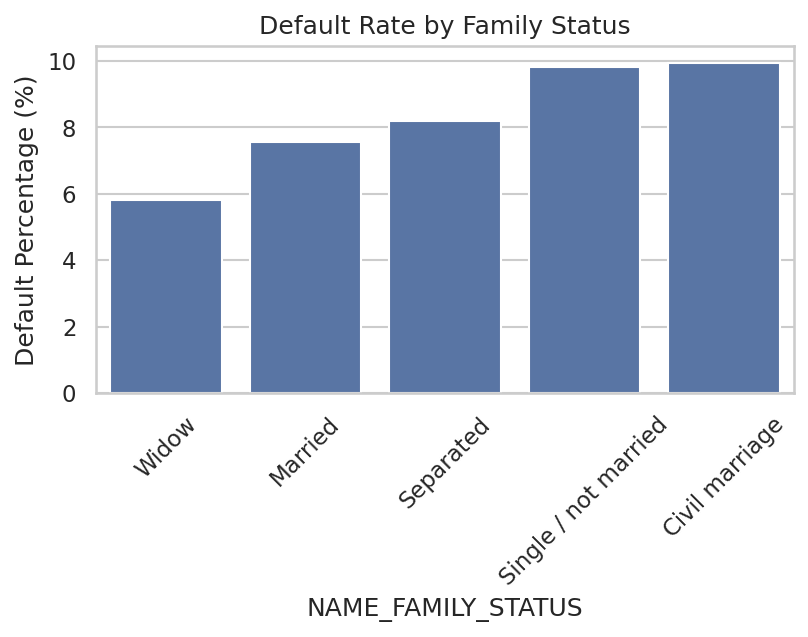

In [58]:
# Function to plot categorical stats
def plot_categorical_stats(column, title):
    plt.figure(figsize=(6, 3))

    # Calculate default rate per category
    temp = app_data.groupby(column)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    # Plot only the Default (Target=1) percentages
    sns.barplot(x=column, y='percent', data=temp[temp['TARGET'] == 1], order=temp[temp['TARGET'] == 1].sort_values('percent').iloc[:,0])
    plt.title(f'Default Rate by {title}')
    plt.xticks(rotation=45)
    plt.ylabel('Default Percentage (%)')
    plt.show()

# Income Type
# Finding: "Students and Businessmen have no payment difficulties"
plot_categorical_stats('NAME_INCOME_TYPE', 'Income Type')

# Education
# Finding: "Higher education has less payment difficulties"
plot_categorical_stats('NAME_EDUCATION_TYPE', 'Education Level')

# Family Status
# Finding: "Widows have lower default rates than single/married"
plot_categorical_stats('NAME_FAMILY_STATUS', 'Family Status')

# Correlation Analysis (Separated by Target 0 vs. Target 1)

The most significant finding is the breakdown of the relationship between total income and loan size among defaulters. For repayers (Target=0), AMT_INCOME_TOTAL shows a normal, moderate correlation with both AMT_CREDIT ($0.34$) and AMT_ANNUITY ($0.42$). However, for defaulters (Target=1), this correlation practically vanishes ($0.04$ and $0.05$, respectively). This suggests that for defaulting applications, the approved loan amounts were entirely decoupled from the applicant's reported income, highlighting a major area of credit risk.

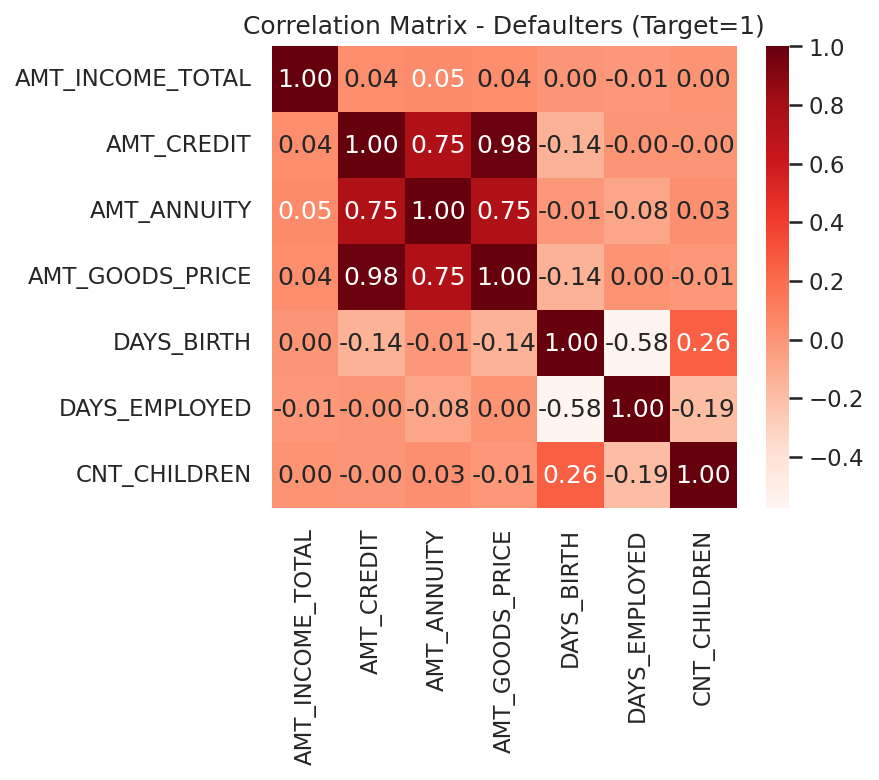

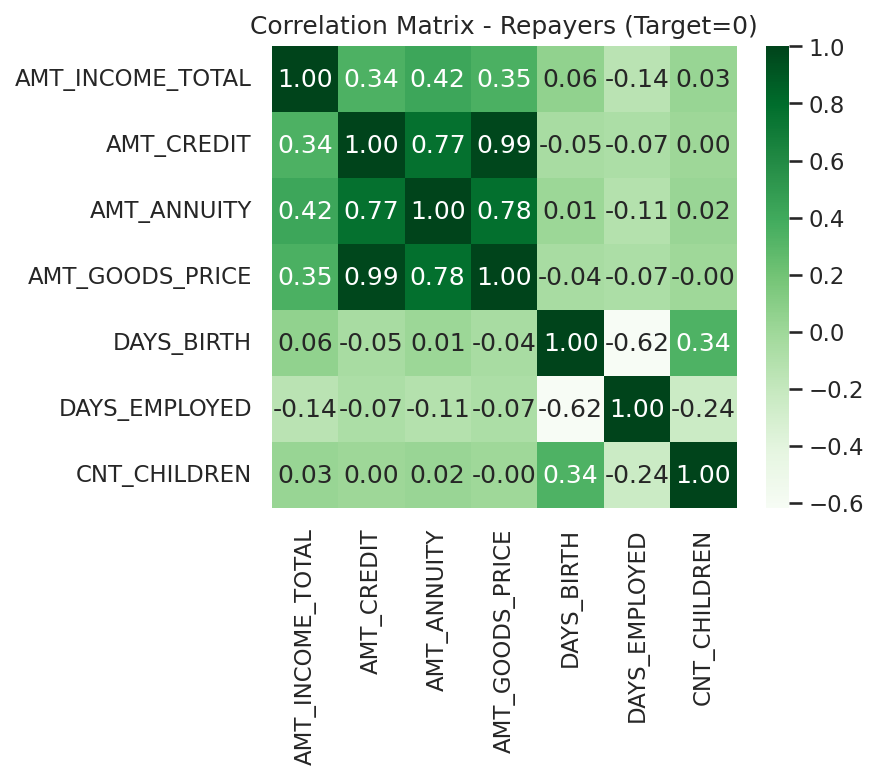

In [59]:
# Split data
defaulters = app_data[app_data['TARGET'] == 1]
non_defaulters = app_data[app_data['TARGET'] == 0]

# Select only numerical columns for correlation
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN']

# Correlation for Defaulters (Target=1)
plt.figure(figsize=(5, 4))
sns.heatmap(defaulters[numerical_cols].corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix - Defaulters (Target=1)')
plt.show()

# Correlation for Non-Defaulters (Target=0)
plt.figure(figsize=(5, 4))
sns.heatmap(non_defaulters[numerical_cols].corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix - Repayers (Target=0)')
plt.show()

In [82]:
app.groupby("TARGET")["AMT_INCOME_TOTAL"].agg(["mean","std","min","max"])

,mean,std,min,max
TARGET,,,,
0,169077.722266,110476.268524,25650.0,18000090.0
1,165611.760906,746676.959440,25650.0,117000000.0


# Univariate Analysis - Numerical (Focus: Credit Amount, Age, Goods Price)

### Age as a Primary Risk Factor (YEARS_BIRTH):
The density plot for age reveals a distinct divergence between the two target groups. The distribution for defaulters (Target=1) is heavily skewed toward younger demographics, peaking sharply around 25 to 35 years of age. In contrast, repayers (Target=0) display a much flatter, broader distribution with a higher concentration of individuals in the 35 to 60 age range. This strongly suggests that financial maturity and age are key mitigating factors for credit risk.

### Uniformity in Loan & Goods Values (AMT_CREDIT & AMT_GOODS_PRICE):
Both the credit amounts and the prices of the goods financed show heavy right-skewed distributions. The vast majority of loans are clustered at the lower end of the financial spectrum. Notably, the overall shape of these distributions remains largely identical across both repayers and defaulters. This indicates that the absolute size of the loan is not a strong standalone predictor of default; rather, it is the loan size relative to other factors (like age or income) that determines risk.

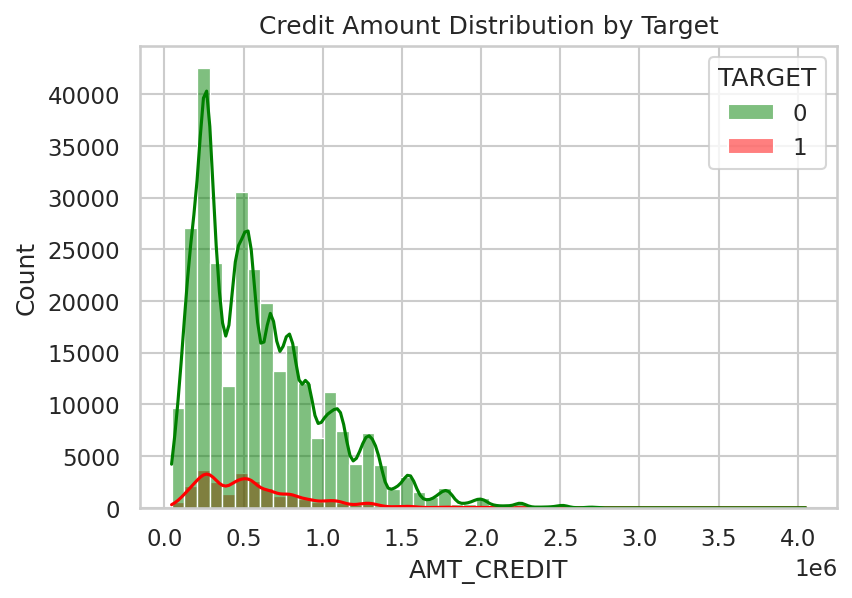

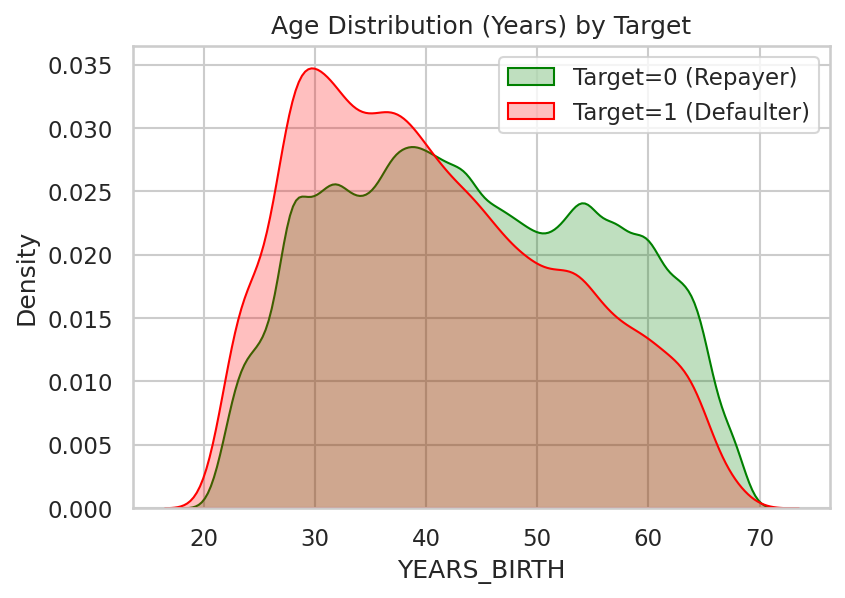

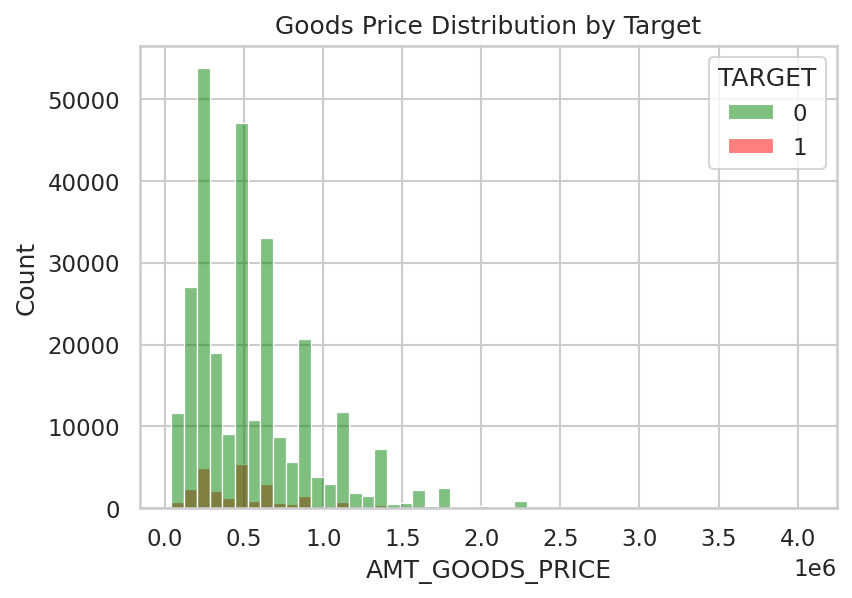

In [60]:
# Credit Distribution
# Finding: Higher default rate for credit between 250k - 650k
plt.figure(figsize=(6, 4))
sns.histplot(data=app_data, x='AMT_CREDIT', hue='TARGET', bins=50, kde=True, palette=['green', 'red'])
plt.title('Credit Amount Distribution by Target')
plt.show()

# Age Analysis
# Create YEARS_BIRTH as per PDF
app_data['YEARS_BIRTH'] = abs(app_data['DAYS_BIRTH']) / 365
# Finding: Higher default for ages 20-40
plt.figure(figsize=(6, 4))
sns.kdeplot(data=app_data[app_data['TARGET'] == 0]['YEARS_BIRTH'], label='Target=0 (Repayer)', fill=True, color='green')
sns.kdeplot(data=app_data[app_data['TARGET'] == 1]['YEARS_BIRTH'], label='Target=1 (Defaulter)', fill=True, color='red')
plt.title('Age Distribution (Years) by Target')
plt.legend()
plt.show()

# Goods Price
plt.figure(figsize=(6, 4))
sns.histplot(data=app_data, x='AMT_GOODS_PRICE', hue='TARGET', bins=50, palette=['green', 'red'])
plt.title('Goods Price Distribution by Target')
plt.show()

# Bivariate Analysis (Complex interactions like Income vs. Gender vs. Goods Price)

### Data Quality Observation:
The presence of the "XNA" (Not Available/Undisclosed) gender category within the "Working" and "Commercial associate" groups highlights a minor data quality issue that may require imputation or targeted cleaning.

### Consistent Gender Disparities:
Across nearly all employment categories, male applicants (M) consistently take out loans for higher-priced goods compared to female applicants (F). This trend is visible from standard "Working" professionals to "Pensioners" and "Students."

### High-Value Pursuits in Risky Cohorts:
Unsurprisingly, the "Businessman" category finances the most expensive goods on average. However, a critical observation is that high-risk cohorts identified earlier, specifically the "Unemployed" and those on "Maternity leave", also finance relatively high-priced goods. This combination of pursuing expensive goods without a highly stable, active income source likely compounds their overall default risk.

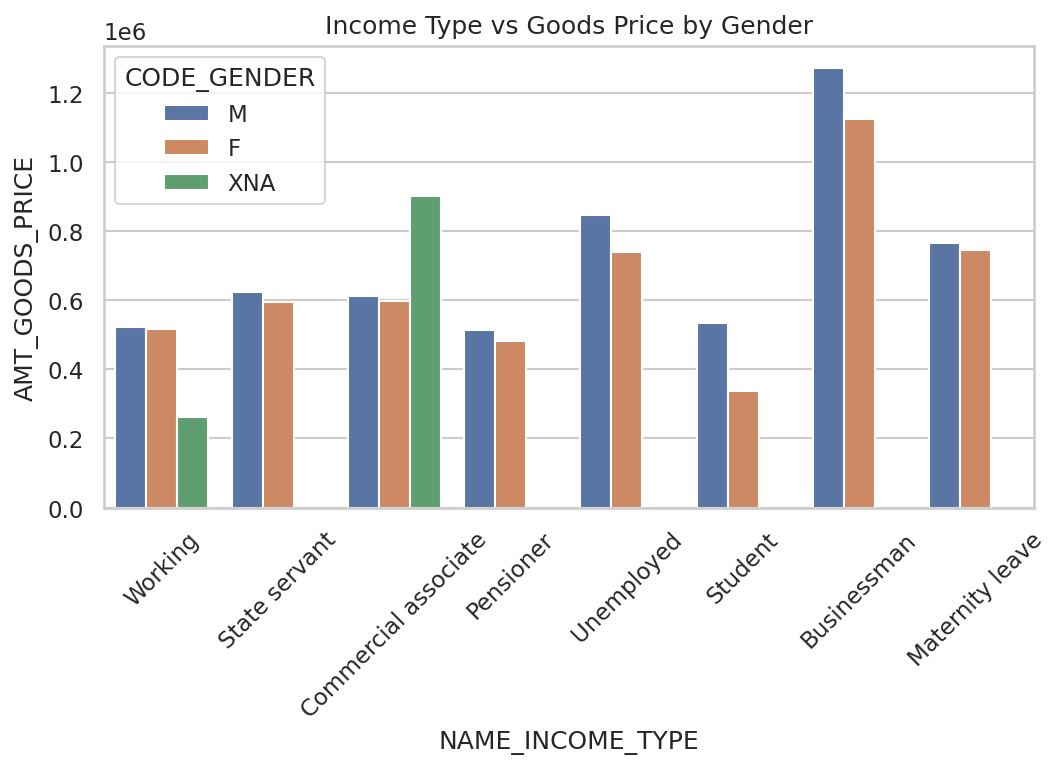

In [61]:
# Income Type vs Goods Price vs Gender
# Unemployed Males have very high goods price in On-Time payments
plt.figure(figsize=(8, 4))
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_GOODS_PRICE', hue='CODE_GENDER', data=app_data, errorbar=None)
plt.title('Income Type vs Goods Price by Gender')
plt.xticks(rotation=45)
plt.show()

# Other Analysis

In [62]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

# Basic cleaning used in Home Credit EDA
app = app_data.copy()
prev = prev_app.copy()

# Replace the known anomaly in DAYS_EMPLOYED (365243 means "not employed" in this dataset)
if "DAYS_EMPLOYED" in app.columns:
    app["DAYS_EMPLOYED"] = app["DAYS_EMPLOYED"].replace(365243, np.nan)

# Create AGE and YEARS_BIRTH_CATEGORY from DAYS_BIRTH (negative days)
if "DAYS_BIRTH" in app.columns:
    app["AGE_YEARS"] = (-app["DAYS_BIRTH"] / 365.25)

    # categories: 20-30, 30-40, 40-50, 50-60, 60-70
    bins = [20, 30, 40, 50, 60, 70]
    labels = ["20-30", "30-40", "40-50", "50-60", "60-70"]
    app["YEARS_BIRTH_CATEGORY"] = pd.cut(app["AGE_YEARS"], bins=bins, labels=labels, right=False)

# Helper: merge client-level columns from application table into previous_application
def merge_app_cols_into_prev(prev_df, app_df, cols):
    keep_cols = ["SK_ID_CURR"] + cols
    keep_cols = [c for c in keep_cols if c in app_df.columns]
    return prev_df.merge(app_df[keep_cols], on="SK_ID_CURR", how="left")

### 1. Long employment history is a stronger indicator of repayment reliability than income level.

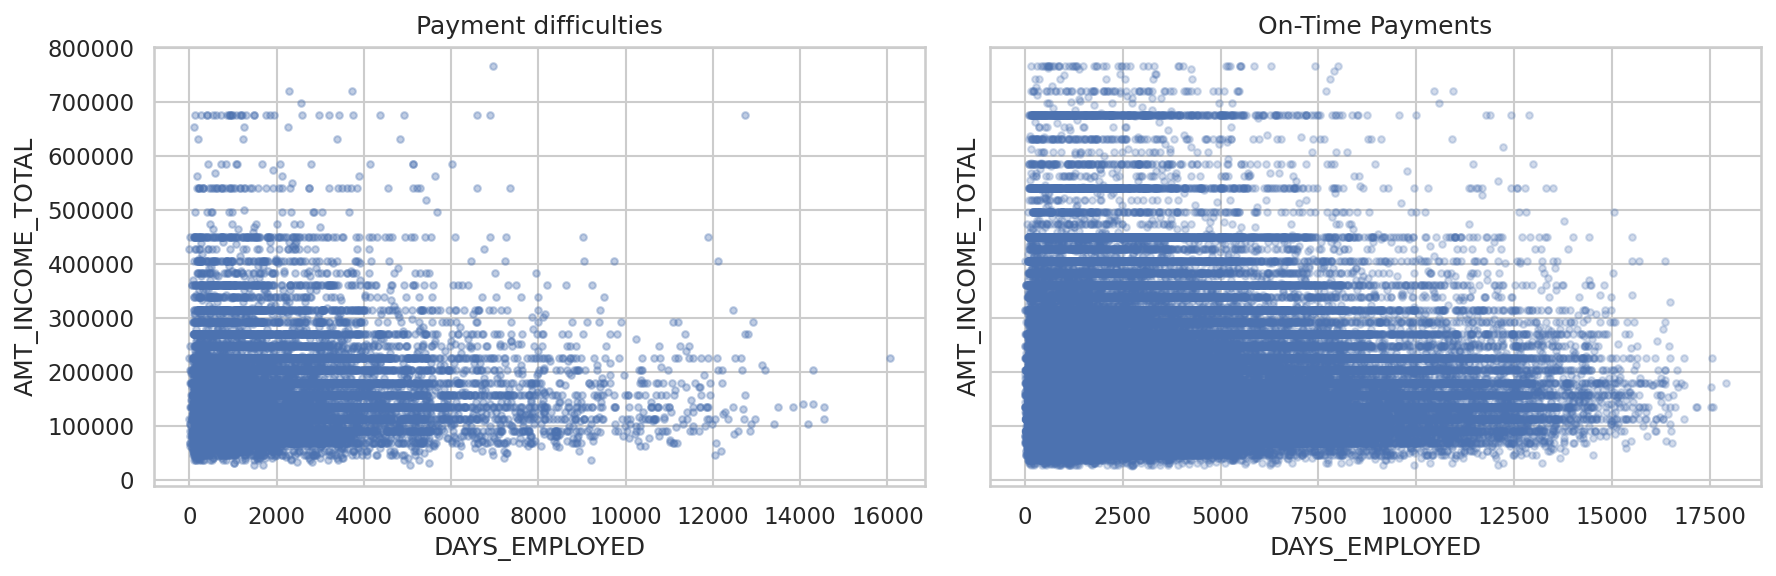

Income cap used: 765000.0
Max DAYS_EMPLOYED_POS: 17912.0


In [66]:
# --- 1) DAYS_EMPLOYED -> make it positive "tenure days" ---
# In this dataset, DAYS_EMPLOYED is usually negative; 365243 is an anomaly.
app = app_data.copy()
app["DAYS_EMPLOYED"] = app["DAYS_EMPLOYED"].replace(365243, np.nan)

# Convert to positive tenure days (only where DAYS_EMPLOYED <= 0)
app["DAYS_EMPLOYED_POS"] = (-app["DAYS_EMPLOYED"]).where(app["DAYS_EMPLOYED"] <= 0, np.nan)

# --- Fix 2: cap income outliers so points are visible (use 99.5% cap; adjust if needed) ---
income_cap = app["AMT_INCOME_TOTAL"].quantile(0.998)
app_plot = app.loc[app["AMT_INCOME_TOTAL"] <= income_cap].copy()

x_col = "DAYS_EMPLOYED_POS"
y_col = "AMT_INCOME_TOTAL"
t_col = "TARGET"

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Payment difficulties (TARGET=1)
df1 = app_plot.loc[app_plot[t_col] == 1, [x_col, y_col]].dropna()
axes[0].scatter(df1[x_col], df1[y_col], s=10, alpha=0.35)
axes[0].set_title("Payment difficulties")
axes[0].set_xlabel("DAYS_EMPLOYED")
axes[0].set_ylabel("AMT_INCOME_TOTAL")

# On-time payments (TARGET=0)
df0 = app_plot.loc[app_plot[t_col] == 0, [x_col, y_col]].dropna()
axes[1].scatter(df0[x_col], df0[y_col], s=10, alpha=0.25)
axes[1].set_title("On-Time Payments")
axes[1].set_xlabel("DAYS_EMPLOYED")
axes[1].set_ylabel("AMT_INCOME_TOTAL")

plt.tight_layout()
plt.show()

print("Income cap used:", income_cap)
print("Max DAYS_EMPLOYED_POS:", app_plot["DAYS_EMPLOYED_POS"].max())


### Approval likelihood is highest among middle-aged applicants (30–50), while very young and older applicants receive fewer approvals, though approval remains the most common outcome for all ages.

Columns in prev_age include YEARS_BIRTH_CATEGORY? True


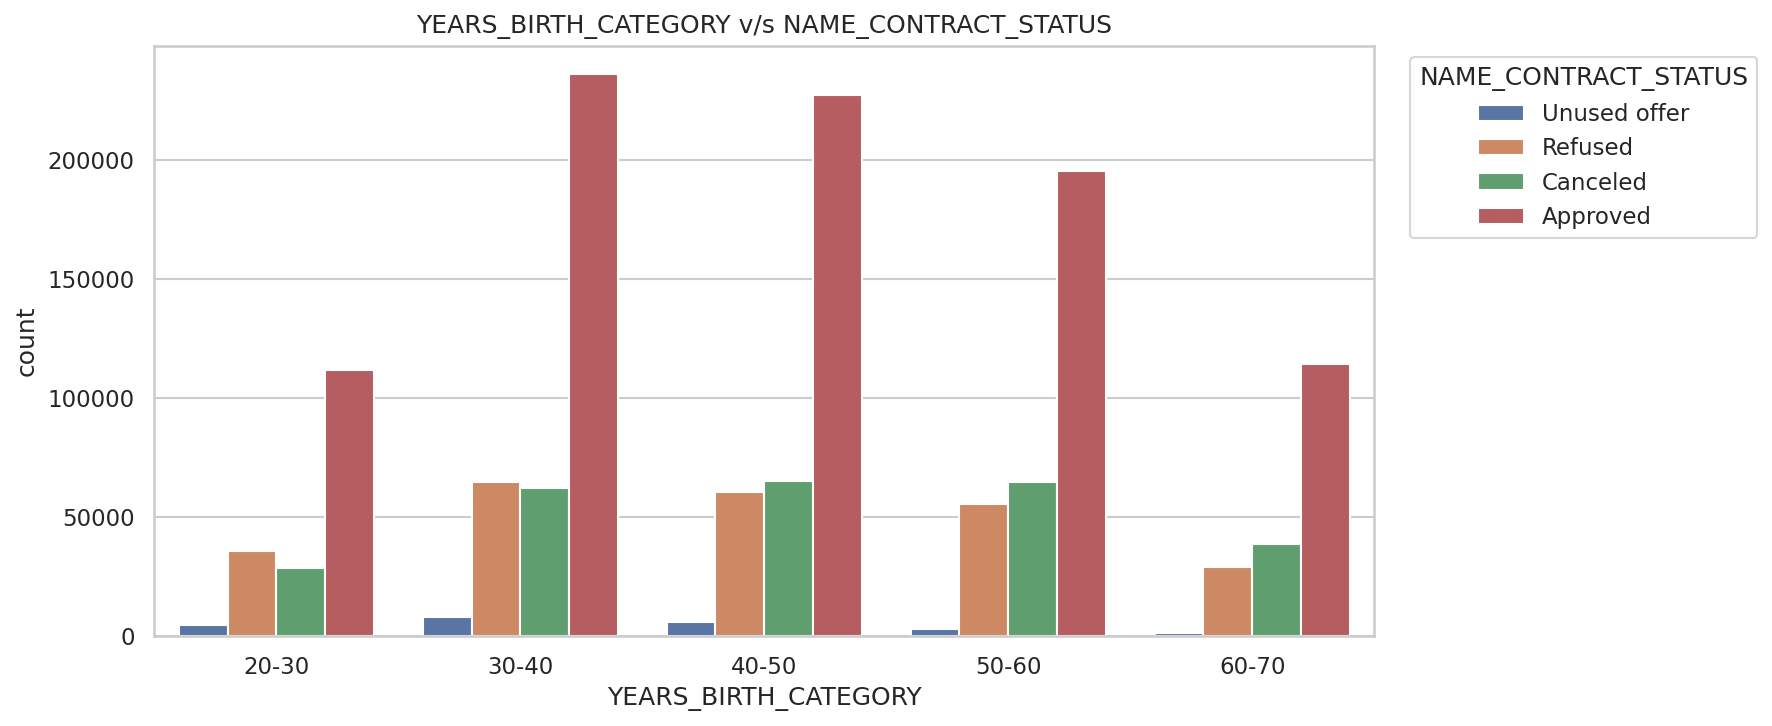

In [73]:
# --- safety copies ---
app = app_data.copy()
prev = prev_app.copy()

# --- 1) make YEARS_BIRTH_CATEGORY in app (if missing) ---
if "YEARS_BIRTH_CATEGORY" not in app.columns:
    if "DAYS_BIRTH" not in app.columns:
        raise KeyError("app_data is missing DAYS_BIRTH, cannot create YEARS_BIRTH_CATEGORY.")

    app["AGE_YEARS"] = (-app["DAYS_BIRTH"] / 365.25)

    bins = [20, 30, 40, 50, 60, 70]
    labels = ["20-30", "30-40", "40-50", "50-60", "60-70"]
    app["YEARS_BIRTH_CATEGORY"] = pd.cut(app["AGE_YEARS"], bins=bins, labels=labels, right=False)

# --- 2) merge into prev safely ---
def merge_app_cols_into_prev(prev_df, app_df, cols):
    keep_cols = ["SK_ID_CURR"] + cols
    missing = [c for c in keep_cols if c not in app_df.columns]
    if missing:
        raise KeyError(f"These columns are missing from app_df and cannot be merged: {missing}")

    out = prev_df.merge(app_df[keep_cols], on="SK_ID_CURR", how="left")
    return out

prev_age = merge_app_cols_into_prev(prev, app, cols=["YEARS_BIRTH_CATEGORY"])

# --- 3) sanity check ---
print("Columns in prev_age include YEARS_BIRTH_CATEGORY?",
      "YEARS_BIRTH_CATEGORY" in prev_age.columns)

# --- 4) plot ---
order_age = ["20-30", "30-40", "40-50", "50-60", "60-70"]
hue_order_status = ["Unused offer", "Refused", "Canceled", "Approved"]

plot_df = prev_age.dropna(subset=["YEARS_BIRTH_CATEGORY", "NAME_CONTRACT_STATUS"]).copy()

plt.figure(figsize=(12, 5))
sns.countplot(
    data=plot_df,
    x="YEARS_BIRTH_CATEGORY",
    order=[x for x in order_age if x in plot_df["YEARS_BIRTH_CATEGORY"].astype(str).unique()],
    hue="NAME_CONTRACT_STATUS",
    hue_order=[h for h in hue_order_status if h in plot_df["NAME_CONTRACT_STATUS"].unique()],
)
plt.xlabel("YEARS_BIRTH_CATEGORY")
plt.ylabel("count")
plt.title("YEARS_BIRTH_CATEGORY v/s NAME_CONTRACT_STATUS")
plt.legend(title="NAME_CONTRACT_STATUS", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [74]:
"""
# --- 2) YEARS_BIRTH_CATEGORY vs NAME_CONTRACT_STATUS (counts) ---
# NAME_CONTRACT_STATUS is in previous_application, YEARS_BIRTH_CATEGORY from application_data -> merge
prev_age = merge_app_cols_into_prev(prev, app, cols=["YEARS_BIRTH_CATEGORY"])

order_age = ["20-30", "30-40", "40-50", "50-60", "60-70"]
hue_order_status = ["Unused offer", "Refused", "Canceled", "Approved"]  # matches your legend ordering

plt.figure(figsize=(12, 5))
sns.countplot(
    data=prev_age.dropna(subset=["YEARS_BIRTH_CATEGORY", "NAME_CONTRACT_STATUS"]),
    x="YEARS_BIRTH_CATEGORY",
    order=order_age,
    hue="NAME_CONTRACT_STATUS",
    hue_order=[h for h in hue_order_status if h in prev_age["NAME_CONTRACT_STATUS"].unique()],
)
plt.xlabel("YEARS_BIRTH_CATEGORY")
plt.ylabel("count")
plt.title("YEARS_BIRTH_CATEGORY v/s NAME_CONTRACT_STATUS")
plt.legend(title="NAME_CONTRACT_STATUS", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()
"""

'\n# --- 2) YEARS_BIRTH_CATEGORY vs NAME_CONTRACT_STATUS (counts) ---\n# NAME_CONTRACT_STATUS is in previous_application, YEARS_BIRTH_CATEGORY from application_data -> merge\nprev_age = merge_app_cols_into_prev(prev, app, cols=["YEARS_BIRTH_CATEGORY"])\n\norder_age = ["20-30", "30-40", "40-50", "50-60", "60-70"]\nhue_order_status = ["Unused offer", "Refused", "Canceled", "Approved"]  # matches your legend ordering\n\nplt.figure(figsize=(12, 5))\nsns.countplot(\n    data=prev_age.dropna(subset=["YEARS_BIRTH_CATEGORY", "NAME_CONTRACT_STATUS"]),\n    x="YEARS_BIRTH_CATEGORY",\n    order=order_age,\n    hue="NAME_CONTRACT_STATUS",\n    hue_order=[h for h in hue_order_status if h in prev_age["NAME_CONTRACT_STATUS"].unique()],\n)\nplt.xlabel("YEARS_BIRTH_CATEGORY")\nplt.ylabel("count")\nplt.title("YEARS_BIRTH_CATEGORY v/s NAME_CONTRACT_STATUS")\nplt.legend(title="NAME_CONTRACT_STATUS", bbox_to_anchor=(1.02, 1), loc="upper left")\nplt.tight_layout()\nplt.show()\n'

### Married applicants constitute the majority of approvals, but approval dominance across all family-status groups suggests marital status alone is not a decisive predictor of credit approval.

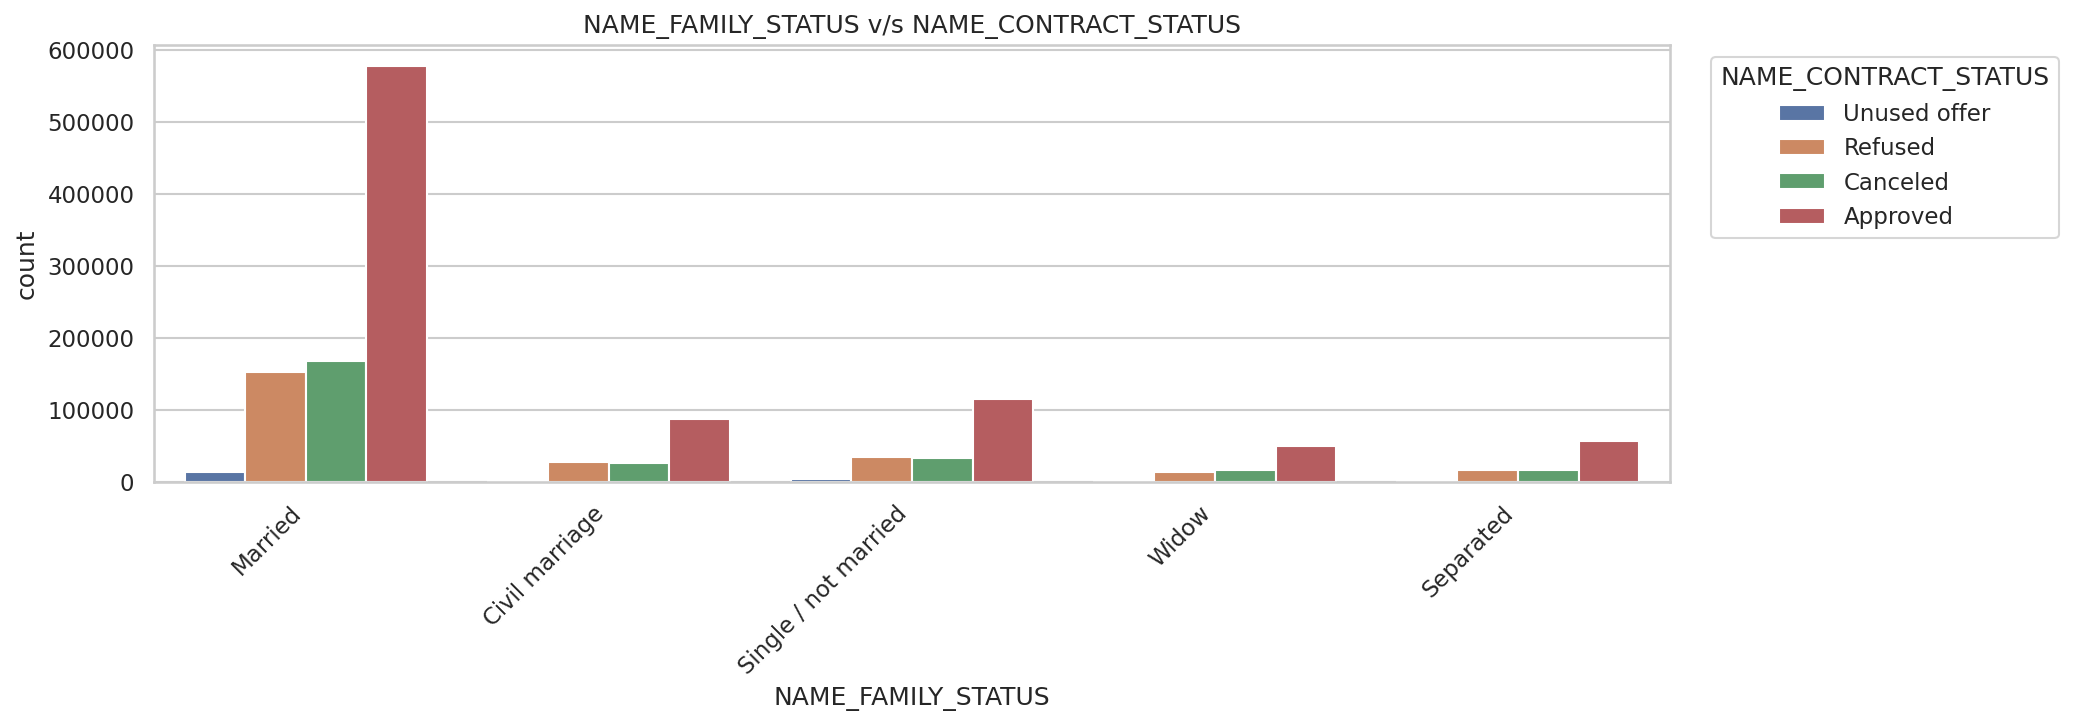

In [68]:
# --- 3) NAME_FAMILY_STATUS vs NAME_CONTRACT_STATUS (counts) ---
prev_fam = merge_app_cols_into_prev(prev, app, cols=["NAME_FAMILY_STATUS"])

plt.figure(figsize=(14, 5))
sns.countplot(
    data=prev_fam.dropna(subset=["NAME_FAMILY_STATUS", "NAME_CONTRACT_STATUS"]),
    x="NAME_FAMILY_STATUS",
    hue="NAME_CONTRACT_STATUS",
    hue_order=[h for h in ["Unused offer", "Refused", "Canceled", "Approved"] if h in prev_fam["NAME_CONTRACT_STATUS"].unique()],
)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("count")
plt.title("NAME_FAMILY_STATUS v/s NAME_CONTRACT_STATUS")
plt.xticks(rotation=45, ha="right")
plt.legend(title="NAME_CONTRACT_STATUS", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Education level is strongly associated with loan size, with higher-educated clients receiving larger credit amounts, while gender shows minimal impact.

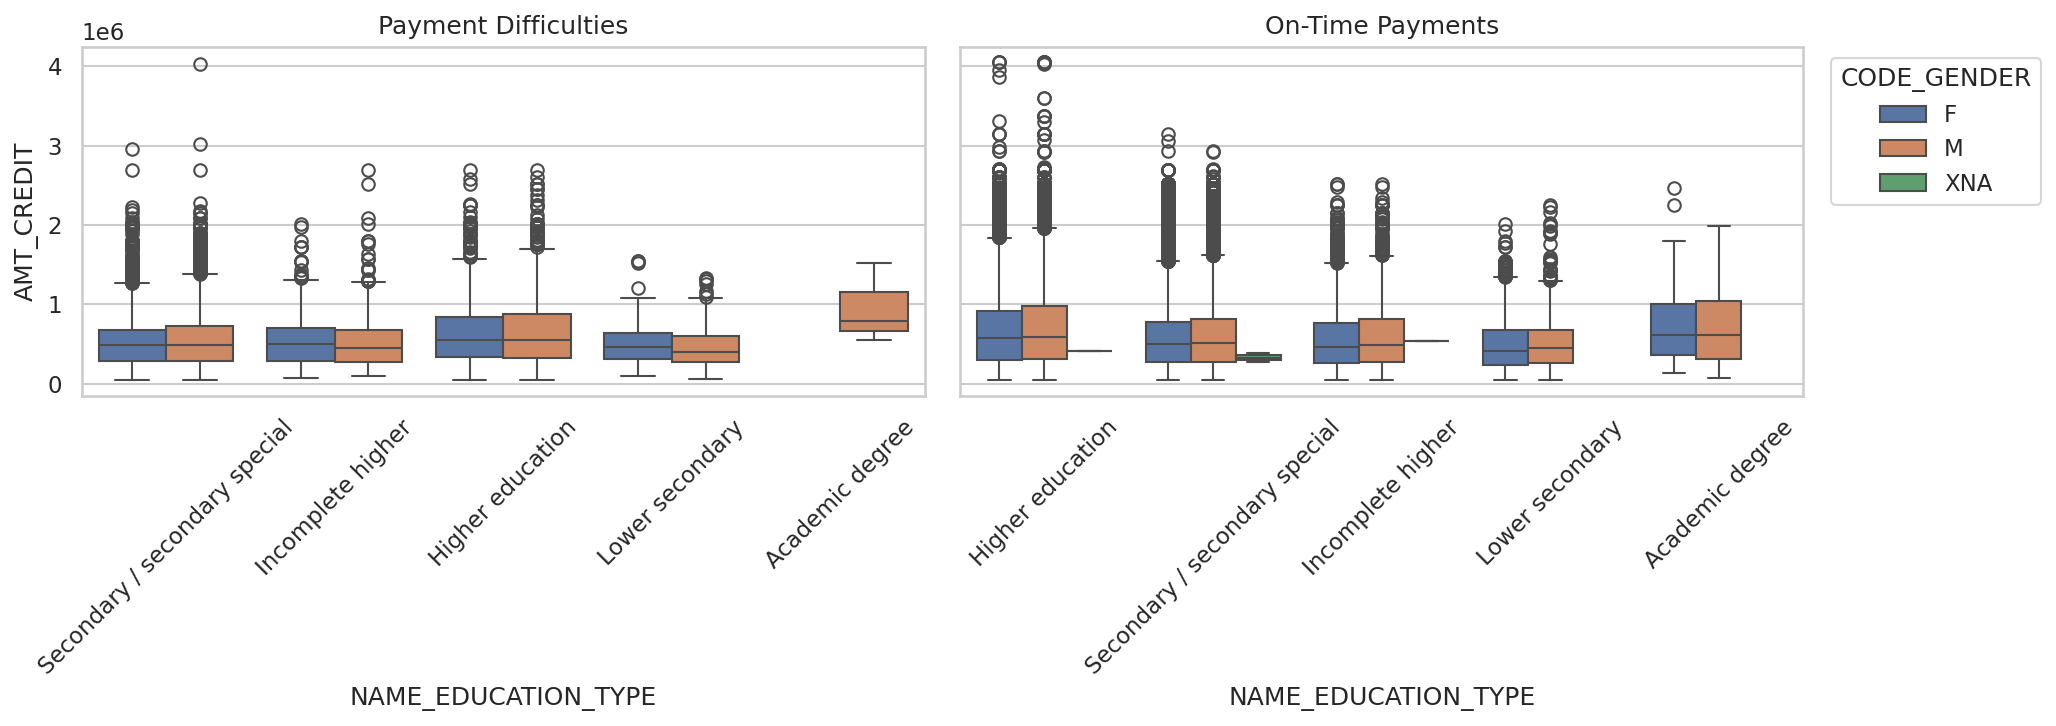

In [69]:
# --- 4) NAME_EDUCATION_TYPE vs AMT_CREDIT vs CODE_GENDER (boxplots; split by TARGET) ---
x = "NAME_EDUCATION_TYPE"
y = "AMT_CREDIT"
hue = "CODE_GENDER"

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Payment difficulties
df1 = app.loc[app["TARGET"] == 1, [x, y, hue]].dropna()
sns.boxplot(data=df1, x=x, y=y, hue=hue, ax=axes[0])
axes[0].set_title("Payment Difficulties")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].tick_params(axis="x", rotation=45)

# On-time payments
df0 = app.loc[app["TARGET"] == 0, [x, y, hue]].dropna()
sns.boxplot(data=df0, x=x, y=y, hue=hue, ax=axes[1])
axes[1].set_title("On-Time Payments")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].tick_params(axis="x", rotation=45)

# Keep legend once (right plot), remove left legend
axes[0].legend_.remove()
axes[1].legend(title=hue, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Income source is a strong determinant of loan size, with business and commercial workers receiving the largest financing, while students and unemployed clients receive smaller loans; gender has little observable impact.

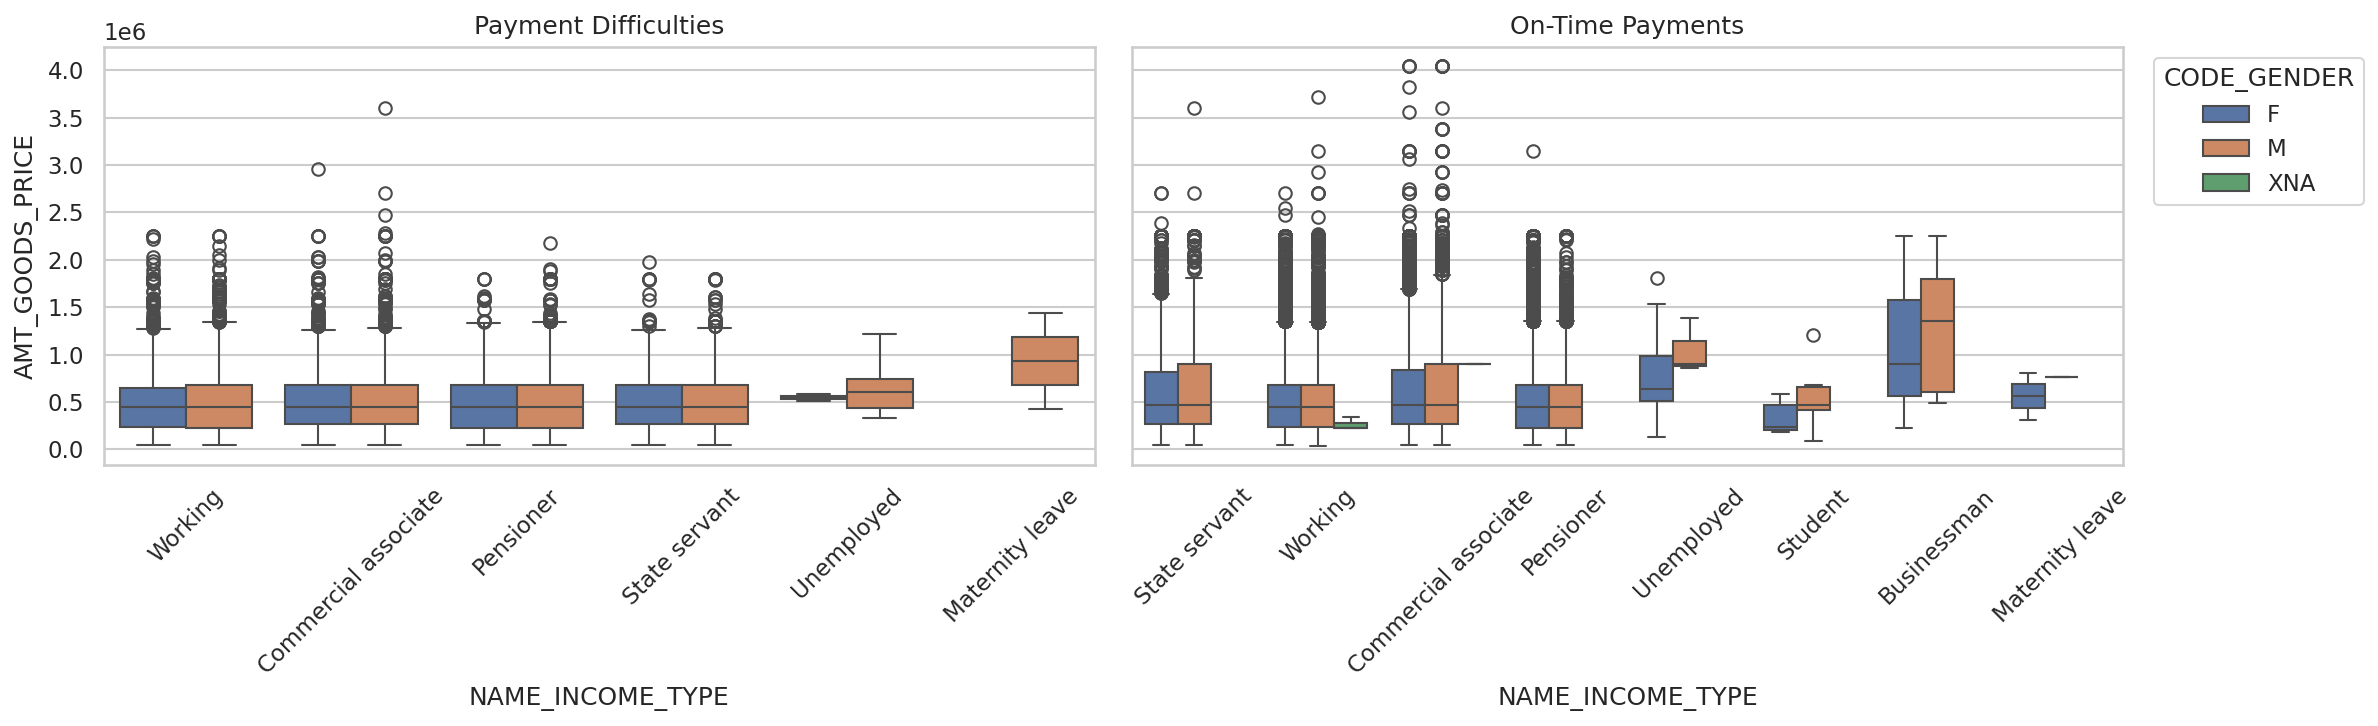

In [70]:
# --- 5) NAME_INCOME_TYPE vs AMT_GOODS_PRICE vs CODE_GENDER (boxplots; split by TARGET) ---
x = "NAME_INCOME_TYPE"
y = "AMT_GOODS_PRICE"
hue = "CODE_GENDER"

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

df1 = app.loc[app["TARGET"] == 1, [x, y, hue]].dropna()
sns.boxplot(data=df1, x=x, y=y, hue=hue, ax=axes[0])
axes[0].set_title("Payment Difficulties")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].tick_params(axis="x", rotation=45)

df0 = app.loc[app["TARGET"] == 0, [x, y, hue]].dropna()
sns.boxplot(data=df0, x=x, y=y, hue=hue, ax=axes[1])
axes[1].set_title("On-Time Payments")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].tick_params(axis="x", rotation=45)

axes[0].legend_.remove()
axes[1].legend(title=hue, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Prior lending history strongly correlates with approval volume, with repeat clients being the most favored segment by lenders.

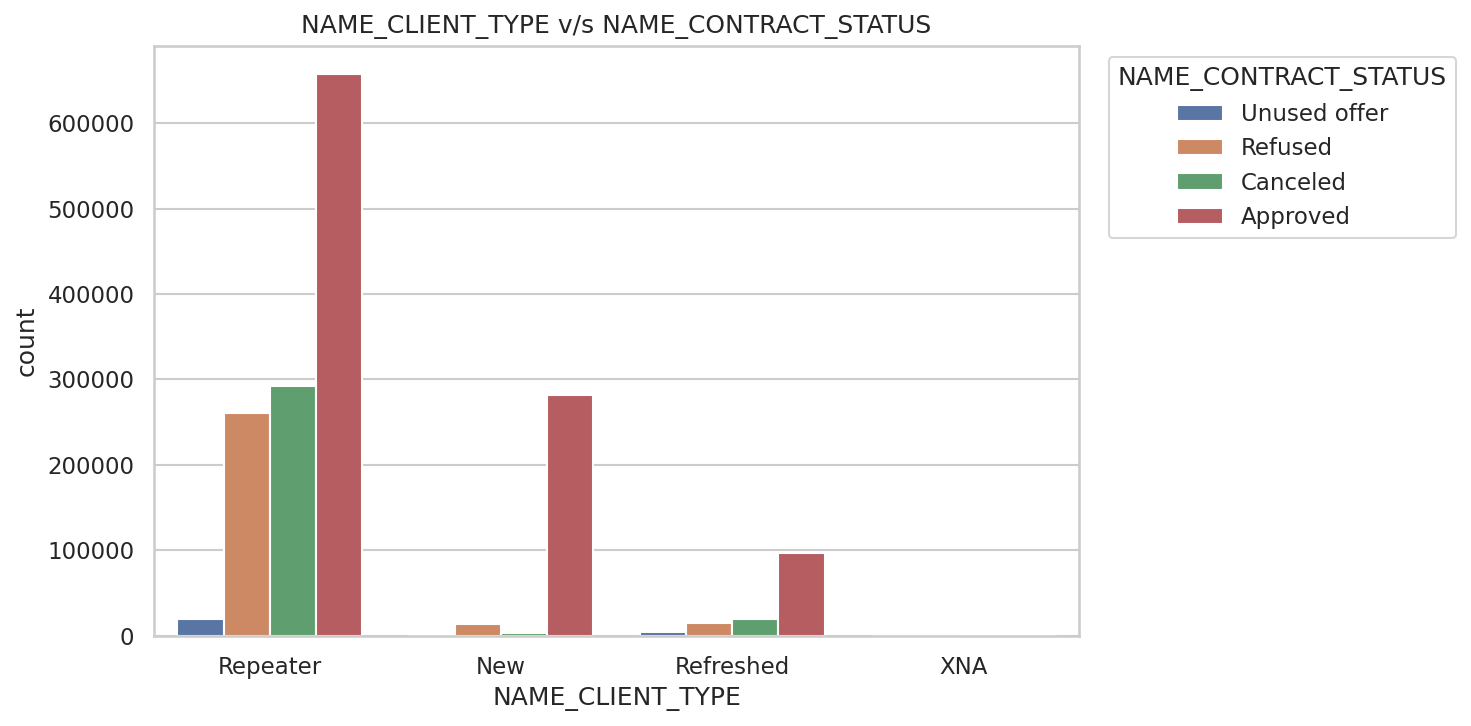

In [71]:
# --- 6) NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS (counts; prev_app only) ---
plt.figure(figsize=(10, 5))
sns.countplot(
    data=prev.dropna(subset=["NAME_CLIENT_TYPE", "NAME_CONTRACT_STATUS"]),
    x="NAME_CLIENT_TYPE",
    hue="NAME_CONTRACT_STATUS",
    hue_order=[h for h in ["Unused offer", "Refused", "Canceled", "Approved"] if h in prev["NAME_CONTRACT_STATUS"].unique()],
)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("count")
plt.title("NAME_CLIENT_TYPE v/s NAME_CONTRACT_STATUS")
plt.legend(title="NAME_CONTRACT_STATUS", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()
